# Part I - SanFran GoBike Data Exploration
## by Gerardo Najarro

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling

In [146]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


## Load Dataset

In [147]:
# Load the local CSV file
gobike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [148]:
# Get number of rows and columns of data table to see structure
gobike_data.shape

(183412, 16)

In [149]:
# Display summary information, including the number of non-null entries, data types, and memory usage.
gobike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [150]:
# Fetch the first 10 rows to see what the data looks like
gobike_data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


### What is the structure of your dataset?

> The dataset has 16 columns and 183412 rows.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in the dataset is analyzing and understanding how demographics influences a trip's duration, time, and location based on the data from the bike-sharing system.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Focusing on analyzing start times and durations to identify peak usage periods and trends. Examining the start stations to determine high-demand locations. Along with considering user's age and user's gender to understand which user groups are more engaged with the system. These features will help support my investigation as they will help me explore the influence demographics have on the popularity of the bike-sharing system.

In [151]:
# Count NaN values in 'member_birth_year'
nan_member_birth_year = gobike_data['member_birth_year'].isna().sum()

# Count NaN values in 'member_gender'
nan_member_gender = gobike_data['member_gender'].isna().sum()

# Print the counts of NaN values
print(f"Number of NaN values in 'member_birth_year': {nan_member_birth_year}")
print(f"Number of NaN values in 'member_gender': {nan_member_gender}")

Number of NaN values in 'member_birth_year': 8265
Number of NaN values in 'member_gender': 8265


As I will use this information to better understand different demographics usage of the system, I will need to purge any rows that lack this information.

In [152]:
# Remove rows where 'member_birth_year' or 'member_gender' have NaN values
gobike_data_clean = gobike_data.dropna(subset=['member_birth_year', 'member_gender'])

# Save the cleaned dataset to a CSV file
gobike_data_clean.to_csv('gobike_data_clean.csv', index=False)

## Univariate Exploration

# Plot 1

## Histogram Plot
> First, we will look at the distribution of durations to see what is the average length riders prefer to go for when using the bike-sharing system.

### What is the distribution of bike trip durations in the dataset?

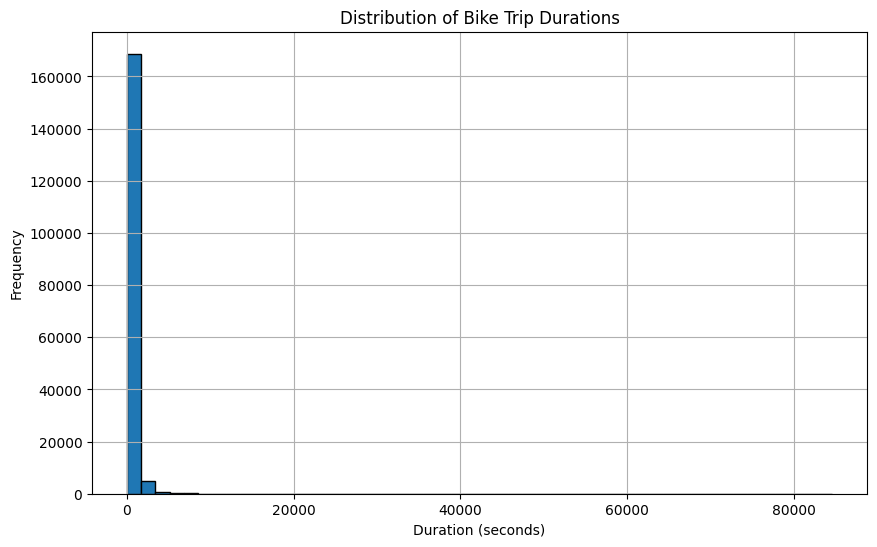

        duration_sec
101361         85444
85465          84548
153705         83772
127999         83519
112435         83407
...              ...
13596           9434
2188            9424
44185           9418
78832           9405
40876           9395

[500 rows x 1 columns]


In [153]:
# Plot histogram of trip durations
# Sets figure size
plt.figure(figsize=(10, 6)) 

# Creates a histogram of the duration_sec
plt.hist(gobike_data_clean['duration_sec'], bins=50, edgecolor='black')

# Add plot title and labels
plt.title('Distribution of Bike Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Adds a grid for better readability.
plt.grid(True)

# Display the plot
plt.show()

# Extract the 'duration_sec' column and gets the 500 longest durations
durations_list = gobike_data.nlargest(500, 'duration_sec')
print(durations_list[['duration_sec']]) 

From the plot above and the subsequent duration_list, we can see that riders are on average riding less than 5,000 seconds (roughly an hour and a half) but there is a small population of riders that go beyond 5,000 which gives the graph a large and empty apperance. 

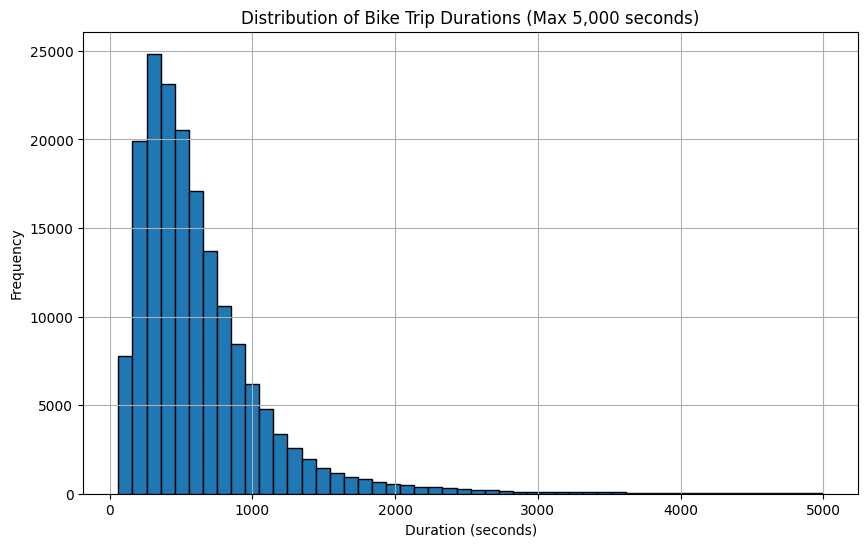

In [154]:
# Filter durations to include only those from 0 to 5,000 seconds
gobike_data_clean = gobike_data_clean[gobike_data_clean['duration_sec'] <= 5000]

# Plot histogram of filtered trip durations
plt.figure(figsize=(10, 6))
plt.hist(gobike_data_clean['duration_sec'], bins=50, edgecolor='black')

# Add plot title and labels
plt.title('Distribution of Bike Trip Durations (Max 5,000 seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Adds a grid for better readability.
plt.grid(True)

# Display the plot
plt.show()

In [155]:
# Save the filtered dataset to a new CSV file
gobike_data_clean.to_csv('gobike_data_clean.csv', index=False)

This filtered plot now shows a more accurate distribution of bike trip durations with the outliers excluded. 

# Plot 2

## Count Plot
> We also want to look at the different start stations to determine which of these locations provide higher trip counts and if any outliers can be excluded as done with the duration variable above.

### Which stations have the most frequent trips?

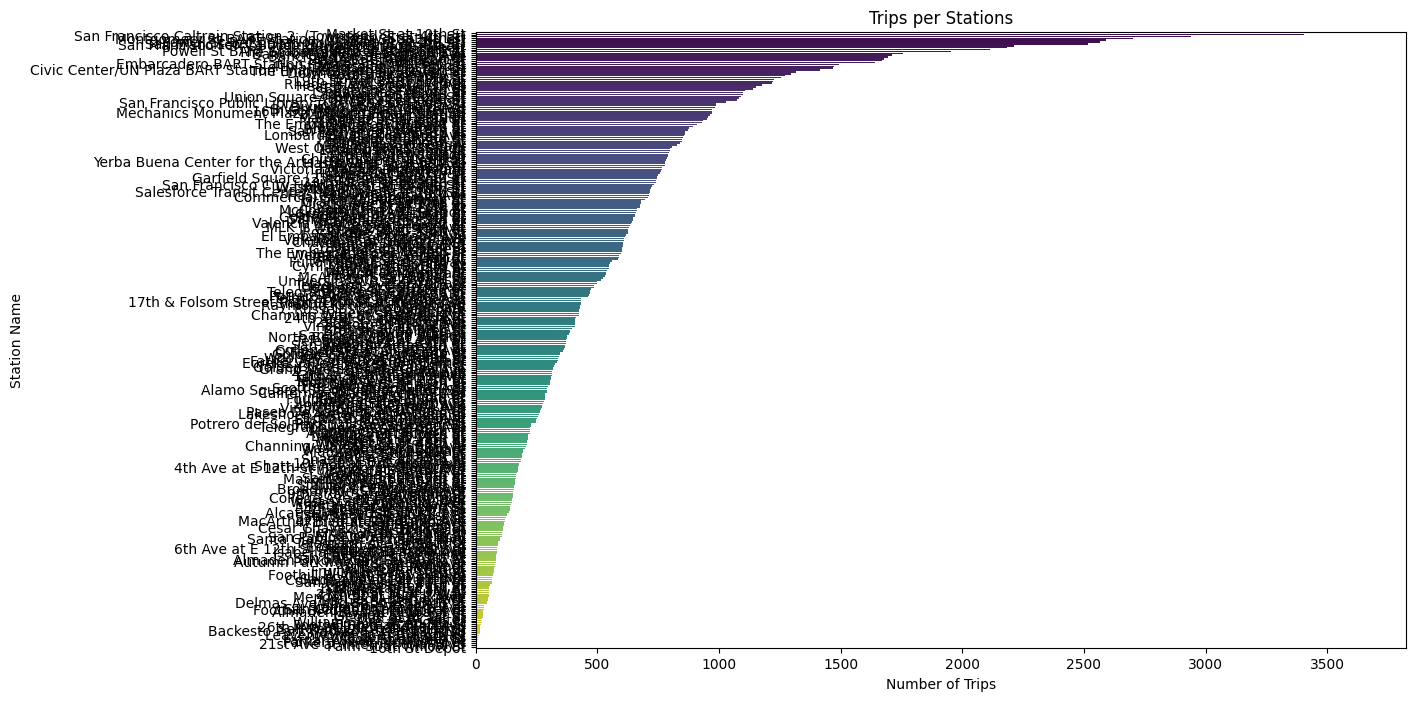

Number of unique start stations: 329


In [156]:
# Create a count plot for start_station_name
plt.figure(figsize=(12, 8))
sns.countplot(
    y='start_station_name',  # Use y-axis for better label visibility
    data=gobike_data_clean,
    order=gobike_data_clean['start_station_name'].value_counts().index,  # Order by frequency
    palette='viridis'  # Color palette
)

# Add plot title and labels
plt.title('Trips per Stations')
plt.xlabel('Number of Trips')
plt.ylabel('Station Name')

# Show the plot
plt.show()

# Print the number of unique start stations
num_unique_stations = gobike_data_clean['start_station_name'].nunique()
print(f"Number of unique start stations: {num_unique_stations}")

This plot is very difficult to read, but provides us with valuable information on the number of trips made through the hundreds of unique stations. We can see that less than a quarter have more than a thousand trips and as such this will be the cut off point for our exploration of the dataset.

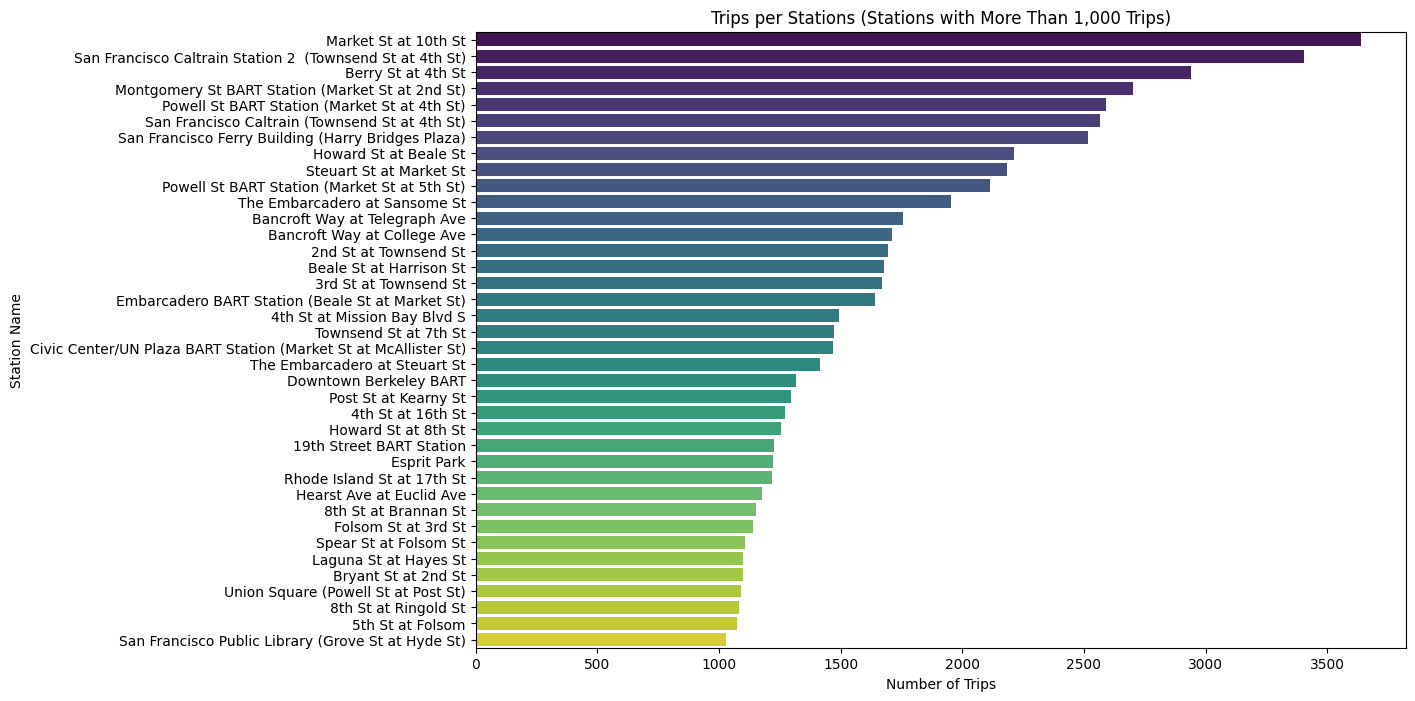

Number of unique start stations: 38


In [157]:
# Count the number of trips for each start station
station_counts = gobike_data_clean['start_station_name'].value_counts()

# Filter to include only stations with more than 1,000 trips
stations_over_1000 = station_counts[station_counts > 1000].index

# Filter the dataset to include only these stations
gobike_data_clean = gobike_data_clean[gobike_data_clean['start_station_name'].isin(stations_over_1000)]

# Create a count plot for the stations with more than 1,000 trips
plt.figure(figsize=(12, 8))
sns.countplot(
    y='start_station_name',  # Use y-axis for better label visibility
    data=gobike_data_clean,
    order=stations_over_1000,  # Order by the stations with more than 1,000 trips
    palette='viridis'  # Color palette
)

# Add plot title and labels
plt.title('Trips per Stations (Stations with More Than 1,000 Trips)')
plt.xlabel('Number of Trips')
plt.ylabel('Station Name')

# Show the plot
plt.show()

# Print the number of unique start stations
num_unique_stations = gobike_data_clean['start_station_name'].nunique()
print(f"Number of unique start stations: {num_unique_stations}")

In [158]:
# Save the filtered dataset to a new CSV file
gobike_data_clean.to_csv('gobike_data_clean.csv', index=False)

With the new filter, the plot becomes more readable as the number of unqiue station drops from 329 to only 38. This plot now shows while there are several stations between the 1,000-2,500 mark. Only the first three, Market St at 10th St, Townsend St at 4th St, and Berry St at 4th St, go beyond the 2,500 mark.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was an unusal point with the first plot as the x-axis that represented the duration length of a trip went up to 100,000 second, but the only visible bars were seen far below 20,000 seconds. I needed to explore this further by looking at the duration list in descending order. This showed that of the tens of thousands of recorded trips 500 occured between 9,395 to 85,444 seconds. A sample population so small that their bars were not visible in the original Distribution of Bike Trip Durations plot. The second plot also had an unusal point as it could not show any station name. This issue was due to the large number of unique stations, which made it more difficult to plot. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> To deal with the issue of the first plot, I decided to filter the durations to include only those from 0 to 5,000 seconds. In this way the new plot would lose hundreds of the trips that had been cataloged, but would also give a more in depth glimpse of the average duration taken in the other trips without these outliers. To deal with the issue of the second plot, I removed any station that had less than a thousand trips. While this removed hundreds of station, it made the cleaned dataset easier to read and wrangle.

## Bivariate Exploration

# Plot 3

## Scatter Plot
> Working with two variables, lets try and see how demographic plays a role in bike usage. With this scatterplot we will see if there is a correlation between the duration of the trip and the individual's age.

### How does the duration of bike trips vary with the rider's age?

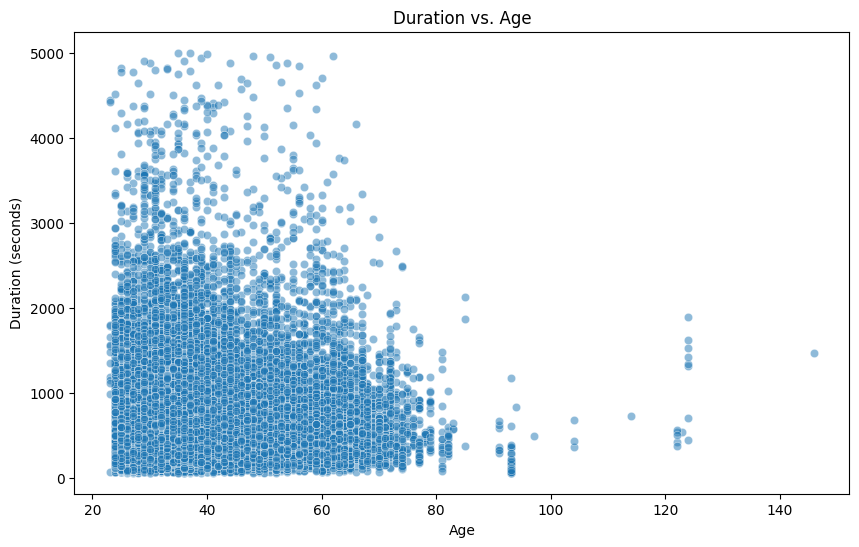

In [159]:
# Calculate member age from birth year
current_year = datetime.now().year
gobike_data_clean['member_age'] = current_year - gobike_data_clean['member_birth_year']

# Create a scatterplot with duration_sec and member_age
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='member_age',
    y='duration_sec',
    data=gobike_data_clean,
    alpha=0.5
)

# Add plot title and labels
plt.title('Duration vs. Age')
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')

# Show the plot
plt.show()

This plot presents a negative relationship as the older an individual is, the shorter the duration of the trip becomes. We can also see that there are some outliers in this dataset as there are trips from indivduals claiming to be over 100 years old.

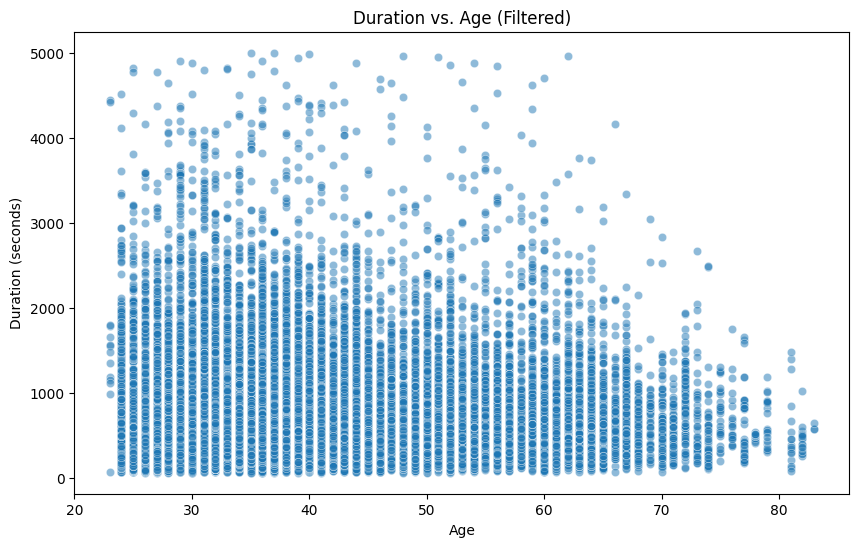

In [160]:
# Calculate member age from birth year
current_year = datetime.now().year
gobike_data_clean['member_age'] = current_year - gobike_data_clean['member_birth_year']

# Filter out members older than 83 years
gobike_data_clean = gobike_data_clean[gobike_data_clean['member_age'] <= 83]

# Create a scatterplot with duration_sec and member_age
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='member_age',
    y='duration_sec',
    data=gobike_data_clean,
    alpha=0.5
)

# Add plot title and labels
plt.title('Duration vs. Age (Filtered)')
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')

# Show the plot
plt.show()

This plot is the revised version with a limit placed on 83 years old (which is the average life expectancy for someone living in San Francisco).

In [161]:
# Save the filtered dataset to a new CSV file
gobike_data_clean.to_csv('gobike_data_clean.csv', index=False)

# Plot 4

## Box Plot
> Now that we have a general understanding of the average user's duration on a trip, let us go more into depth and see how the averages shift when considering gender.

### How do bike trip durations differ between genders??

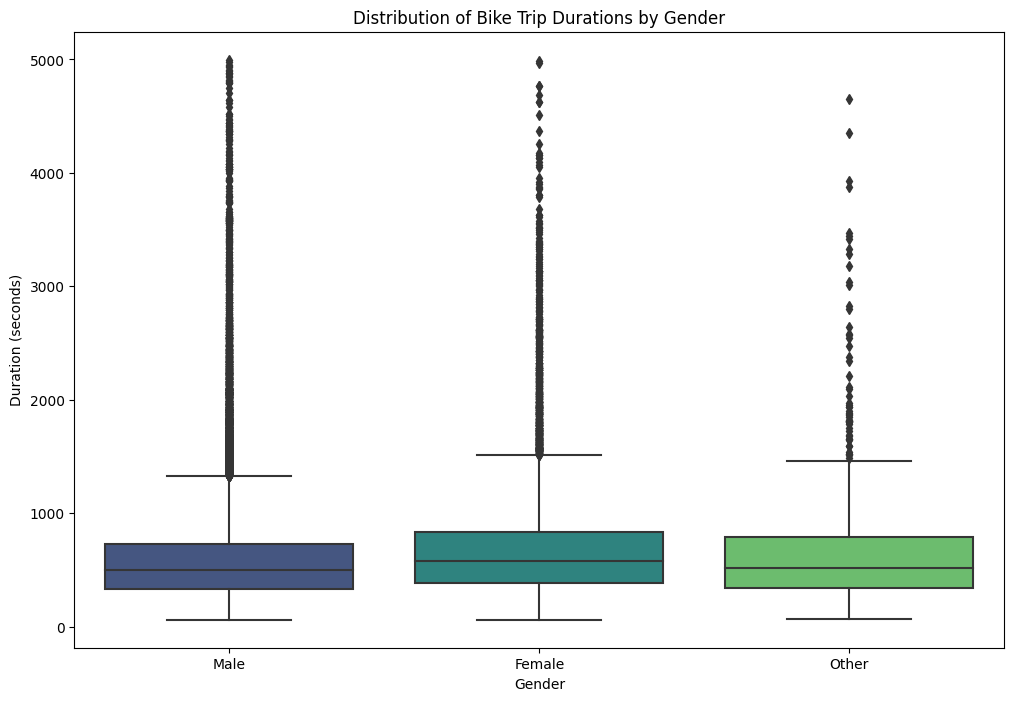

In [162]:
# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='member_gender',  # Gender on x-axis
    y='duration_sec',   # Duration on y-axis
    data=gobike_data_clean,
    palette='viridis'
)

# Add plot title and labels
plt.title('Distribution of Bike Trip Durations by Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')

# Show the plot
plt.show()

This plot presents us with two facts. On average a female bike rider will have longer durations than any other gender, but a male bike rider is more likely to go beyond the 3,000 seconds mark than any other gender.

# Plot 5

## Heatmap Plot
> To have a better understanding of when the bike-sharing system is being utilized, this heatmap will compare the durations found in the first exploratory plot and compare it with different hours of the day.

### What is the average duration of bike trips at different hours of the day?

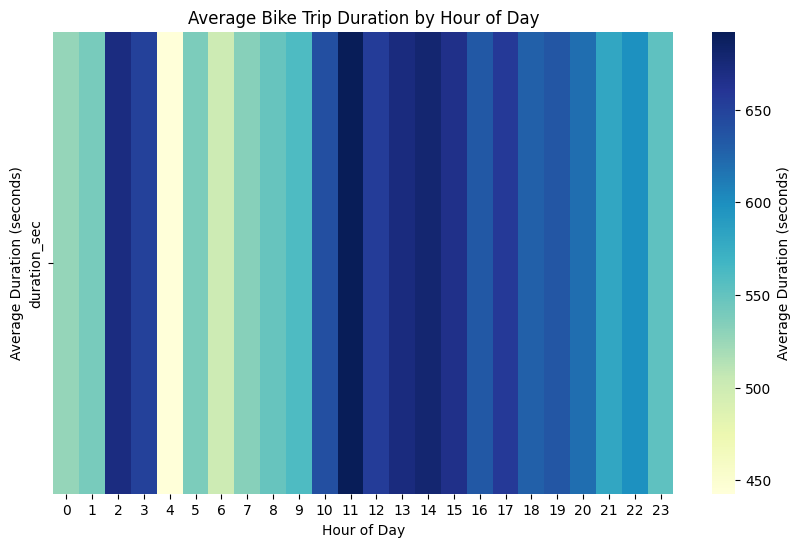

In [163]:
# Convert 'start_time' to datetime format
gobike_data_clean['start_time'] = pd.to_datetime(gobike_data_clean['start_time'])

# Extract the hour of the day as an integer
gobike_data_clean['hour_of_day'] = gobike_data_clean['start_time'].dt.hour

# Create a pivot table for average duration by hour of day
heatmap_data = pd.pivot_table(
    gobike_data_clean,
    values='duration_sec',  # Average trip duration
    index='hour_of_day',  # Rows based on hour of the day
    aggfunc='mean',  # Calculate the mean duration
    fill_value=0  # Fill missing values with 0
).reset_index()  # Convert pivot table back to DataFrame

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data.set_index('hour_of_day').T,  # Transpose to fit the heatmap format
    cmap='YlGnBu',
    annot=False,  # Disable cell annotations
    cbar_kws={'label': 'Average Duration (seconds)'}  # Color bar label
)

# Add plot title and labels
plt.title('Average Bike Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration (seconds)')

# Show the plot
plt.show()

The heatmap visualizes the average duration of bike trips for each hour of the day. The color gradient represents the average duration, with darker or lighter colors indicating the duration's magnitude. This visualization helps identify patterns in bike trip durations throughout different times of the day, showing at which hours the average trip duration is higher or lower. The plot shows that higher durations appear between the time of 10am to 8pm.

In [164]:
# Save the filtered dataset to a new CSV file
gobike_data_clean.to_csv('gobike_data_clean.csv', index=False)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> A negative relationship was identified between age and trip duration. Specifically, as individuals get older, their trip durations tend to decrease. This suggests that older users might prefer shorter trips or may use the bike-sharing system less frequently for longer durations. The box plot showed that women typically have longer trips, while men are more likely to exceed 3,000 seconds in duration. This indicates that women might use the bike-sharing service for longer trips or more frequently. The heatmap showed variations in average trip duration throughout the day. The color gradient in the heatmap indicated that trip durations are generally higher between 10 AM and 8 PM. This suggests that bike usage tends to involve longer trips during these hours, which might be related to increased daytime activities or commuting patterns.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The heatmap highlighted that bike trip durations peak during daytime hours, but oddly enough also during the morning hours of 2am and 3am. The scatter plot had the presence of unrealistic age values which pointed to data inconsistencies. Moreover, while the box plots averaged in the hundreds in terms of seconds, all three categories had outliers that exceeded the thousands, suggesting a sizeable usage within those duration lengths.

## Multivariate Exploration

# Plot 6

## Facet Plot
> By using these three variables, we can create a facet plot that allows for a detailed exploration of how trip duration varies by time of day and across different genders, offering a comprehensive view of the data.

### How does the duration of bike trips vary by hour of the day, and do these patterns differ between genders?

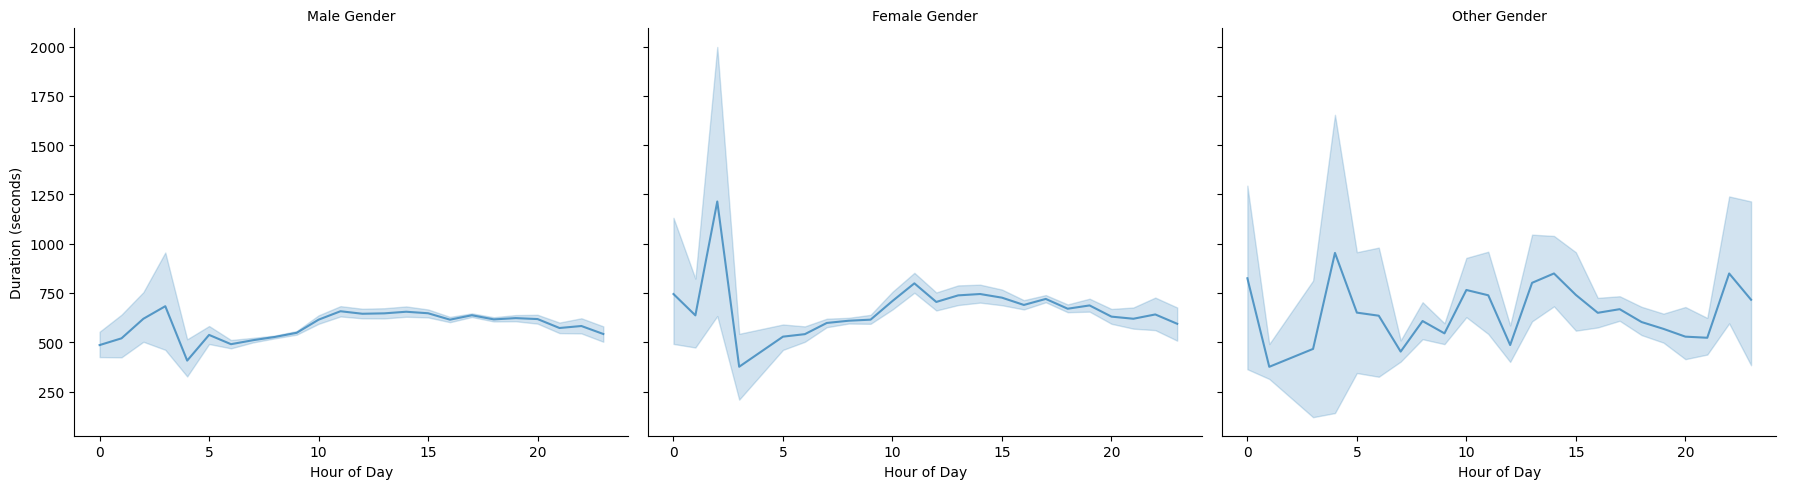

In [165]:
# Create a FacetGrid with line plot
g = sns.FacetGrid(
    gobike_data_clean,
    col='member_gender',  # Facet by gender
    col_wrap=3,  # Wrap the plots into multiple rows if needed
    height=5,  # Height of each facet
    aspect=1.2  # Aspect ratio of each facet
)

# Map the lineplot to each facet
g.map(
    sns.lineplot,
    'hour_of_day',  # X-axis: Hour of the Day
    'duration_sec',  # Y-axis: Duration (seconds)
    alpha=0.7
)

# Add titles and labels
g.set_titles(col_template="{col_name} Gender")
g.set_axis_labels('Hour of Day', 'Duration (seconds)')
g.add_legend()

# Show the plot
plt.show()

In this plot we can see that the average trip duration for males remained fairly consistent throughout the day, typically ranging between 500 to 750 seconds. This consistency indicates a stable behavior in trip duration irrespective of the time of day. Female riders exhibited a slightly higher average trip duration compared to males. Additionally, there was a noticeable spike in trip duration between 2 AM and 3 AM, suggesting a temporary increase in duration during these hours. While riders identified as "Other" showed overall less consistency in trip duration. Their durations varied more widely across different hours of the day, without a clear pattern or trend.

# Plot 7

## Scatter Plot with Multiple Encodings
> Working with three variables, we can now also include gender with the original scatter plot, to further examine how demographic influences bike usage. With this scatterplot we will see if there is further correlation between the duration of the trip and the individual's gender and age.

### How do bike trip durations relate to the age of the members, and does this relationship differ by gender?

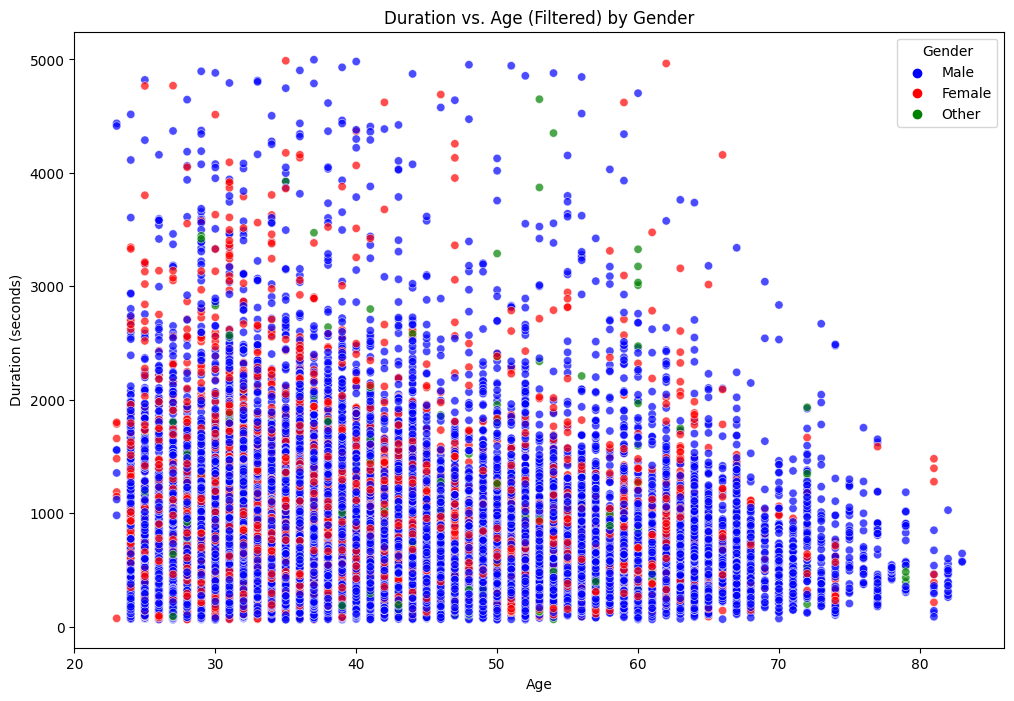

In [166]:
# Define a color palette with distinguishable colors
palette = {
    'Male': 'blue',
    'Female': 'red',
    'Other': 'green'
}

# Create a scatterplot with duration_sec, member_age, and gender
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='member_age',
    y='duration_sec',
    hue='member_gender',  # Color points by gender
    data=gobike_data_clean,
    alpha=0.7,  # Adjust transparency to better visualize overlapping points
    palette=palette  # Use the custom color palette
)

# Add plot title and labels
plt.title('Duration vs. Age (Filtered) by Gender')
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')

# Add a legend to differentiate genders
plt.legend(title='Gender')

# Show the plot
plt.show()

This plot presents the same negative relationship shown in the original scatter plot where as the older an individual is, the shorter the duration of the trip becomes. However, with the added visualization of an individual's gender we can see that this relationship becomes stronger with those who identify as female when compared to those who identify as male.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this facet line plot, we observe distinct patterns in trip durations across different genders throughout the day. For males, the average trip duration remained fairly stable, ranging from 500 to 750 seconds, indicating consistent behavior regardless of the time. In contrast, female riders exhibited a slightly higher average trip duration and a significant spike between 2 AM and 3 AM, reflecting a temporary increase in duration during these hours. Riders identified as "Other" showed less consistency, with durations varying widely without a clear trend. Complementing this analysis, a scatter plot with the added dimension of gender revealed that the negative relationship between age and trip duration is more pronounced among females. As individuals age, the reduction in trip duration is stronger for females compared to males. This combined analysis highlights how gender and age interact to influence bike trip duration, showing that while trip durations remain relatively stable throughout the day for males, females experience notable variations, and the relationship between age and duration is more evident for females.

### Were there any interesting or surprising interactions between features?

> In the 5th plot that dealt with the heatmap, there was high duration activity occurring between 2am and 3am that I was surprised by. I was then only further surprised when the 6th plot showed that that activity was likely done by female night bikers as they had the most activity in those hours. It was also interesting to see in the 7th plot, how as the rider's became older, it became more and more likely that the rider would identify as a male. 

## Conclusions

> During the data exploration process, several key insights were uncovered through a series of plots and analyses. Initially, an unusual observation was made where the x-axis of the duration plot extended to 100,000 seconds, yet bars were only visible below 20,000 seconds. Investigating this, it was found that while most trips were below 20,000 seconds, a small number, around 500, fell between 9,395 and 85,444 seconds, leading to their invisibility in the original distribution plot. To address this, durations were filtered to a maximum of 5,000 seconds, providing a clearer view of typical trip lengths while excluding outliers. Additionally, a plotting issue arose with station names due to the large number of unique stations. By filtering out stations with fewer than 1,000 trips, the dataset became more manageable and readable. Analysis revealed a negative relationship between age and trip duration, with older individuals tending to take shorter trips, potentially indicating less frequent or shorter-duration bike usage. Box plots showed that women generally had longer trips compared to men, who were more likely to exceed 3,000 seconds. A heatmap further illustrated that bike trip durations peaked between 10 AM and 8 PM, with an unexpected spike at 2 AM and 3 AM, predominantly driven by female riders. The facet line plot indicated that while males' trip durations remained stable throughout the day, females showed a higher average duration and a notable spike during late-night hours. The scatter plot reinforced that the negative correlation between age and duration was stronger among females. Overall, these visualizations revealed patterns in bike trip durations related to time of day, gender, and age, with specific insights into outlier behavior and variations in trip durations across different groups.